## Checkpoint 2 

Utilizando o código abaixo para gerar dados de duas classes.

implemente uma rede neural que seja capaz de classificar corretamente os dados.

Utilize como parâmetros seu proprio RM.

exemplo:
 RM = abcde
 - nData = 100 * (a+b+c+d+e)
 - nVertices = 1 * maximo(a,b,c,d,e)



In [191]:
  ### execute essa celula, mas não altere essa função.

import numpy as np
import matplotlib.pyplot as plt

  def generate_data(nData, nVertices):
    c = np.random.uniform()*2*np.pi
    c1 = np.zeros((nData,2))
    c2 = np.zeros((nData,2))
    for ii in range(nData):
      th = np.random.uniform()*2*np.pi;
      r  = 0.5*np.random.uniform()+1.25+0.2*np.cos(nVertices*(th+c));
      c1[ii,:]=r*np.array([np.cos(th), np.sin(th)]);

      th = np.random.uniform()*3*np.pi;
      r  = np.random.uniform()+0.3*np.cos(nVertices*(th+c));
      c2[ii,:]=r*np.array([np.cos(th), np.sin(th)]);
    return c1, c2

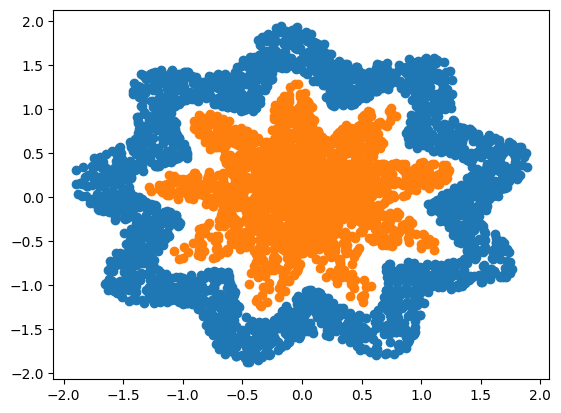

In [192]:
## coloque seu RM aqui!!
RM = [9,4,5,6,0]

nData = 100 * (sum(RM))
nVertices = 1 * max(RM)

#gera os dados
c1, c2 = generate_data(nData,nVertices)

#plot dos dados
plt.scatter(c1[:,0],c1[:,1])
plt.scatter(c2[:,0],c2[:,1])

Comente sobre a decisão de cada parametro utilizado:

Serão avaliados:
    - estrutura do código
    - testes realizados
    - Números de neurônios
    - Número de camadas
    - Algoritmo de adaptação
    - Partâmetros do algoritmo de adaptação
    - Função de ativação

In [193]:
###### Seu desafio começa aqui.......
import pandas as pd
df_c1 = pd.DataFrame(data=c1, columns=["x", "y"])
df_c2 = pd.DataFrame(data=c2, columns=["x", "y"])


In [194]:
#Concatenando linhas
df = pd.concat([df_c1, df_c2], axis=0)
df


,x,y
0,-0.786548,-1.212863
1,-0.547542,1.300293
2,0.165624,1.362058
3,-1.764565,0.237814
4,0.361508,1.255852
...,...,...
2395,-0.016166,0.037088
2396,-0.083324,-0.053861
2397,0.536941,0.194081
2398,-0.387749,0.035799


In [195]:
# Criando uma coluna com zero do mesmo tamanho dos dados
df_zero = pd.DataFrame(data=np.zeros(nData))
df_um = pd.DataFrame(data=np.ones(nData))

# concatenando os dados de uma forma que fiquem de forma vertical 
df_classe = pd.concat([df_zero, df_um], axis=0)

In [196]:
# Juntando os dados em um dataset só
data = pd.concat([df, df_classe], axis=1)
data

,x,y,0
0,-0.786548,-1.212863,0.0
1,-0.547542,1.300293,0.0
2,0.165624,1.362058,0.0
3,-1.764565,0.237814,0.0
4,0.361508,1.255852,0.0
...,...,...,...
2395,-0.016166,0.037088,1.0
2396,-0.083324,-0.053861,1.0
2397,0.536941,0.194081,1.0
2398,-0.387749,0.035799,1.0


In [197]:
from sklearn.model_selection import train_test_split
# treinando
X_train, X_test, y_train, y_test = train_test_split(df.values, df_classe.values, test_size=0.2)

In [198]:
import tensorflow as tf

# Criando modelo
model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, input_dim=2, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilando modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()
print("Loss function:", model.loss)
print("Optimizer name:", model.optimizer.get_config()["name"])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                192       
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 dense_38 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________
Loss function: binary_crossentropy
Optimizer name: Adam


In [187]:
# Fazendo o fit do modelo
history = model.fit(X_train, y_train, epochs=125, validation_split=0.2, batch_size=32)

# Validando
train_loss, train_acc = model.evaluate(X_train,  y_train, verbose=2)
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

Epoch 1/100
96/96 [==============================] - 2s 5ms/step - loss: 0.5312 - accuracy: 0.7041 - val_loss: 0.4007 - val_accuracy: 0.8841
Epoch 2/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2436 - accuracy: 0.9365 - val_loss: 0.1511 - val_accuracy: 0.9661
Epoch 3/100
96/96 [==============================] - 0s 4ms/step - loss: 0.1066 - accuracy: 0.9671 - val_loss: 0.1017 - val_accuracy: 0.9661
Epoch 4/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0780 - accuracy: 0.9775 - val_loss: 0.0961 - val_accuracy: 0.9622
Epoch 5/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0707 - accuracy: 0.9759 - val_loss: 0.0827 - val_accuracy: 0.9661
Epoch 6/100
96/96 [==============================] - 0s 4ms/step - loss: 0.0663 - accuracy: 0.9759 - val_loss: 0.0779 - val_accuracy: 0.9688
Epoch 7/100
96/96 [==============================] - 0s 4ms/step - loss: 0.0619 - accuracy: 0.9772 - val_loss: 0.0727 - val_accuracy: 0.9714
Epoch 8/100
9

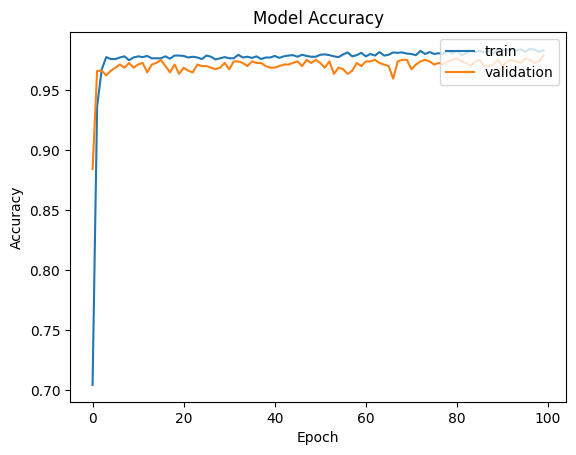

In [188]:
# Gráfico de acurácia
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

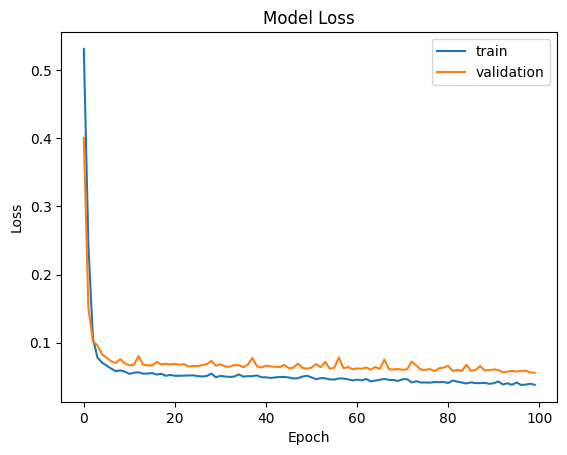

In [189]:
# Gráfico de perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [190]:
# Avaliando o modelo
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Train accuracy: {train_acc:.5f}")
print(f"Test accuracy: {test_acc:.5f}")

120/120 - 0s - loss: 0.0406 - accuracy: 0.9839 - 214ms/epoch - 2ms/step
30/30 - 0s - loss: 0.0380 - accuracy: 0.9865 - 62ms/epoch - 2ms/step
Train accuracy: 0.98385
Test accuracy: 0.98646
